In [157]:
# Dependencies
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from scipy import stats
import numpy as np
from scipy.stats import linregress
import matplotlib
import time
import calendar
import gmaps

from api_keys import g_key

# Analyze Total US Airline Data Domestic and International

In [158]:
# https://www.transtats.bts.gov/Data_Elements.aspx?Data=2
# US flight data for domestic and international
# *Most recent three months of international data by airport and by carrier withheld because of confidentiality agreements for individual routes. 
# Summary totals are shown for all airports and all carriers. 

flight_data_df = pd.read_csv('RawData/Flights_3_12_2020.csv')

In [159]:
flight_data_df

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL
0,2002,10,"815,489","92,565","908,054"
1,2002,11,"766,775","91,342","858,117"
2,2002,12,"782,175","96,881","879,056"
3,2002,TOTAL,"8,085,083","1,023,994","9,109,077"
4,2003,1,"785,651","98,053","883,704"
...,...,...,...,...,...
224,2019,TOTAL,"8,591,641","1,620,275","10,211,916"
225,NaN,NaN,NaN,NaN,NaN
226,Note: All numbers are for scheduled services.,NaN,NaN,NaN,NaN
227,NaN,NaN,NaN,NaN,NaN


In [160]:
# Drop the last few rows which have null values
flight_data_df = flight_data_df.dropna(how='any')

# Drop the rows which have totals for each year
flight_data_df = flight_data_df[flight_data_df['Month'] != 'TOTAL']

In [161]:
# Make all columns as float
columns = flight_data_df.columns
for column in columns:
    flight_data_df[column] = flight_data_df[column].str.replace(",","").astype(float)

In [162]:
# Make Year and Month into integers
flight_data_df['Year'] = flight_data_df['Year'].astype(int)
flight_data_df['Month'] = flight_data_df['Month'].astype(int)

In [163]:
# Make a date column that uses the month and year and assumes the 1st of every month
Date = []
for y, m in zip(flight_data_df.Year, flight_data_df.Month):
    Date.append(datetime(y, m, 1))

flight_data_df['Date'] = Date

In [164]:
flight_data_df

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL,Date
0,2002,10,815489.0,92565.0,908054.0,2002-10-01
1,2002,11,766775.0,91342.0,858117.0,2002-11-01
2,2002,12,782175.0,96881.0,879056.0,2002-12-01
4,2003,1,785651.0,98053.0,883704.0,2003-01-01
5,2003,2,690750.0,85965.0,776715.0,2003-02-01
...,...,...,...,...,...,...
219,2019,8,769346.0,147077.0,916423.0,2019-08-01
220,2019,9,703929.0,123258.0,827187.0,2019-09-01
221,2019,10,740139.0,126268.0,866407.0,2019-10-01
222,2019,11,694283.0,119996.0,814279.0,2019-11-01


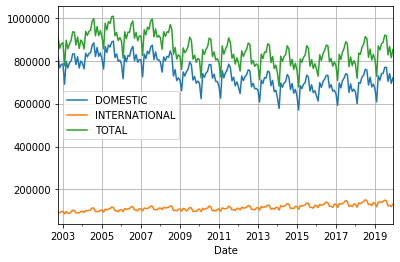

In [165]:
ax = plt.gca()
flight_data_df.plot.line(x = 'Date', y='DOMESTIC',ax=ax)
flight_data_df.plot.line(x = 'Date', y='INTERNATIONAL',ax=ax)
flight_data_df.plot.line(x = 'Date', y='TOTAL',ax=ax)
ax.grid()
plt.show()

# Ebola Data Analysis (Vikash Bhakta)

In [166]:
#https://data.humdata.org/dataset/ebola-cases-2014
ebola_df = pd.read_csv('RawData/ebola_data_db_format.csv')
ebola_df.head()

,Indicator,Country,Date,value
0,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,3285.0
1,Cumulative number of confirmed Ebola cases,Guinea,2015-03-10,2871.0
2,Cumulative number of probable Ebola cases,Guinea,2015-03-10,392.0
3,Cumulative number of suspected Ebola cases,Guinea,2015-03-10,22.0
4,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,2170.0


In [167]:
ebola_df['Indicator'].value_counts()

Cumulative number of confirmed, probable and suspected Ebola deaths                            2485
Cumulative number of confirmed Ebola cases                                                     2484
Cumulative number of confirmed, probable and suspected Ebola cases                             2477
Cumulative number of probable Ebola cases                                                      2436
Cumulative number of suspected Ebola cases                                                     2366
Cumulative number of confirmed Ebola deaths                                                    1648
Cumulative number of probable Ebola deaths                                                     1526
Cumulative number of suspected Ebola deaths                                                    1308
Number of confirmed Ebola cases in the last 21 days                                             190
Number of confirmed, probable and suspected Ebola cases in the last 21 days                     190


In [168]:
# Keep the only two indicators I care about
ebola_df = ebola_df[(ebola_df['Indicator']=='Cumulative number of confirmed, probable and suspected Ebola cases')|
        (ebola_df['Indicator']=='Cumulative number of confirmed, probable and suspected Ebola deaths')]

# Pivot table on values and make new columns as indicators
ebola_df = ebola_df.pivot_table(values='value', index=['Country', 'Date'], columns=['Indicator'])
ebola_df= ebola_df.reset_index()
ebola_df

Indicator,Country,Date,"Cumulative number of confirmed, probable and suspected Ebola cases","Cumulative number of confirmed, probable and suspected Ebola deaths"
0,Guinea,2014-08-29,648.0,430.0
1,Guinea,2014-09-05,812.0,517.0
2,Guinea,2014-09-08,862.0,555.0
3,Guinea,2014-09-12,861.0,557.0
4,Guinea,2014-09-16,936.0,595.0
...,...,...,...,...
2480,United States of America,2015-12-17,4.0,1.0
2481,United States of America,2015-12-22,4.0,1.0
2482,United States of America,2015-12-23,4.0,1.0
2483,United States of America,2015-12-29,4.0,1.0


In [169]:
ebola_df['Country'].value_counts()

Sierra Leone                259
Guinea                      259
Liberia                     259
Nigeria                     255
Senegal                     254
United States of America    245
Spain                       243
Mali                        243
United Kingdom              221
Italy                       141
Liberia 2                   105
Guinea 2                      1
Name: Country, dtype: int64

In [170]:
# Fix country names
ebola_df['Country'] = ebola_df['Country'].replace({'Liberia 2': 'Liberia', 'Guinea 2': 'Liberia'})

# Rename columns
ebola_df = ebola_df.rename(columns=
                    {'Cumulative number of confirmed, probable and suspected Ebola deaths': 'Cumulative Number of Ebola Deaths',
                    'Cumulative number of confirmed, probable and suspected Ebola cases': 'Cumulative Number of Ebola Cases'})

# Sort by date and country
ebola_df = ebola_df.sort_values(by=['Date', 'Country'])
ebola_df

Indicator,Country,Date,Cumulative Number of Ebola Cases,Cumulative Number of Ebola Deaths
0,Guinea,2014-08-29,648.0,430.0
401,Liberia,2014-08-29,1378.0,694.0
1008,Nigeria,2014-08-29,19.0,7.0
1517,Sierra Leone,2014-08-29,1026.0,422.0
1,Guinea,2014-09-05,812.0,517.0
...,...,...,...,...
1516,Senegal,2016-03-23,1.0,0.0
1775,Sierra Leone,2016-03-23,14122.0,3955.0
2018,Spain,2016-03-23,1.0,0.0
2239,United Kingdom,2016-03-23,1.0,0.0


In [171]:
# Get the last date for each county so we can get final data
last_ebola_data = ebola_df[ebola_df['Date'] == max(ebola_df['Date'])].reset_index()
last_ebola_data


Indicator,index,Country,Date,Cumulative Number of Ebola Cases,Cumulative Number of Ebola Deaths
0,258,Guinea,2016-03-23,3804.0,2536.0
1,400,Italy,2016-03-23,1.0,0.0
2,259,Liberia,2016-03-23,5.0,4.0
3,659,Liberia,2016-03-23,10666.0,4806.0
4,764,Liberia,2016-03-23,9.0,3.0
5,1007,Mali,2016-03-23,8.0,6.0
6,1262,Nigeria,2016-03-23,20.0,8.0
7,1516,Senegal,2016-03-23,1.0,0.0
8,1775,Sierra Leone,2016-03-23,14122.0,3955.0
9,2018,Spain,2016-03-23,1.0,0.0


In [172]:
# Create and clean lat/lng csv
lat_lng_csv = "../group3/citycoords.csv"
lat_lng_df = pd.read_csv(lat_lng_csv)
lat_lng_df = lat_lng_df.rename(columns={"name_long": "Country"})
# lat_lng_df = lat_lng_df.replace(to_replace=['Ireland'],
#                 value='Republic of Ireland')

countries_lat_lng = pd.merge(last_ebola_data, lat_lng_df, on='Country')

countries_lat_lng = countries_lat_lng[['Country', 'Cumulative Number of Ebola Cases', 'Cumulative Number of Ebola Deaths', 'Longitude', 'Latitude']]

# Access maps with unique API key
gmaps.configure(api_key=g_key)

locations = countries_lat_lng[["Latitude", "Longitude"]]

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=countries_lat_lng['Cumulative Number of Ebola Cases'], 
                                 dissipating=False, max_intensity=70,
                                 point_radius=5)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [173]:
# Get final counts for cases, deaths, and mortality rate
final_ebola_cases = last_ebola_data['Cumulative Number of Ebola Cases'].sum()
final_ebola_deaths = last_ebola_data['Cumulative Number of Ebola Deaths'].sum()
ebola_mortality_rate = final_ebola_deaths/final_ebola_deaths

In [174]:
# Get list of dates sorted
dates = ebola_df['Date'].unique().tolist()
dates.sort()

# Group by dates and sum of cases and deaths for each country on date
grouped_date_ebola = ebola_df.groupby('Date')
total_cases = grouped_date_ebola['Cumulative Number of Ebola Cases'].sum().tolist()
total_deathes = grouped_date_ebola['Cumulative Number of Ebola Deaths'].sum().tolist()

In [175]:
# Get cumulative number of cases and deaths across date
grouped_date_ebola =  pd.DataFrame({'Date': dates,
                                   'Cumulative Number of Ebola Cases': total_cases,
                                   'Cumulative Number of Ebola Deaths': total_deathes})

In [176]:
# Create columns that have the change of cases and deaths over the dates
daily_ebola_cases = [grouped_date_ebola.iloc[0,1]]
daily_ebola_deaths = [grouped_date_ebola.iloc[0,2]]

for x in range(1,len(grouped_date_ebola)):
    daily_case = grouped_date_ebola.iloc[x,1] - grouped_date_ebola.iloc[x-1,1]
    daily_ebola_cases.append(daily_case)
    daily_deaths = grouped_date_ebola.iloc[x,2] - grouped_date_ebola.iloc[x-1,2]
    daily_ebola_deaths.append(daily_deaths)
    
grouped_date_ebola['Change in Number of Ebola Cases'] = daily_ebola_cases
grouped_date_ebola['Change in Number of Ebola Deaths'] = daily_ebola_deaths
grouped_date_ebola

,Date,Cumulative Number of Ebola Cases,Cumulative Number of Ebola Deaths,Change in Number of Ebola Cases,Change in Number of Ebola Deaths
0,2014-08-29,3071.0,1553.0,3071.0,1553.0
1,2014-09-05,3967.0,2105.0,896.0,552.0
2,2014-09-08,4293.0,2296.0,326.0,191.0
3,2014-09-12,4390.0,2226.0,97.0,-70.0
4,2014-09-16,4985.0,2461.0,595.0,235.0
...,...,...,...,...,...
254,2015-12-17,28638.0,11315.0,-2.0,0.0
255,2015-12-22,28637.0,11315.0,-1.0,0.0
256,2015-12-23,28637.0,11315.0,0.0,0.0
257,2015-12-29,28637.0,11315.0,0.0,0.0


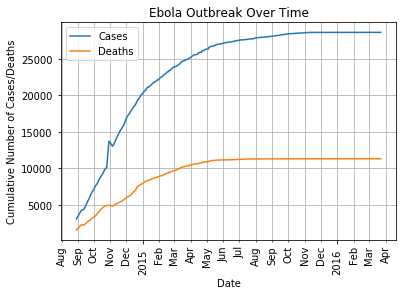

In [177]:
summed_dates = []
for row in grouped_date_ebola['Date']:
    summed_dates.append(matplotlib.dates.date2num(datetime.strptime(row, '%Y-%m-%d')))

cases_over_time, = plt.plot(summed_dates, grouped_date_ebola['Cumulative Number of Ebola Cases'], label="Cases")
deaths_over_time, = plt.plot(summed_dates, grouped_date_ebola['Cumulative Number of Ebola Deaths'], label="Deaths")

ax = plt.gca()
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%b'))
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
ax.tick_params(pad=5)
plt.xticks(rotation=90)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)

plt.title("Ebola Outbreak Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Number of Cases/Deaths")
plt.legend(handles=[cases_over_time, deaths_over_time], loc="best")
plt.grid(which='both')
plt.show()

In [178]:
# Create new column that has month and year so we can compare with flight data later
grouped_date_ebola['Month and Year'] = pd.to_datetime(grouped_date_ebola['Date']).dt.to_period('M')
grouped_ebola = grouped_date_ebola.groupby('Month and Year')
grouped_ebola = grouped_ebola.sum()

In [179]:
# Create new dataframe that has it monthly cases and years
grouped_monthly_ebola =  pd.DataFrame({'Monthly Number of Ebola Cases': grouped_ebola['Change in Number of Ebola Cases'],
                                   'Monthly Number of Ebola Deaths': grouped_ebola['Change in Number of Ebola Deaths']})

grouped_monthly_ebola = grouped_monthly_ebola.reset_index()
# Make new columns for each month and year so we can merge with flight data
grouped_monthly_ebola['Month'] = grouped_monthly_ebola['Month and Year'].dt.month
grouped_monthly_ebola['Year'] = grouped_monthly_ebola['Month and Year'].dt.year

grouped_monthly_ebola

,Month and Year,Monthly Number of Ebola Cases,Monthly Number of Ebola Deaths,Month,Year
0,2014-08,3071.0,1553.0,8,2014
1,2014-09,3503.0,1538.0,9,2014
2,2014-10,6993.0,1860.0,10,2014
3,2014-11,2368.0,738.0,11,2014
4,2014-12,4270.0,2216.0,12,2014
5,2015-01,1954.0,939.0,1,2015
6,2015-02,1701.0,831.0,2,2015
7,2015-03,1132.0,690.0,3,2015
8,2015-04,1333.0,540.0,4,2015
9,2015-05,766.0,252.0,5,2015


In [180]:
ebola_flight_data = pd.read_csv('RawData/Ebola_Top3Countries_2013-2017.csv')
ebola_flight_data

,PASSENGERS,FREIGHT,MAIL,DISTANCE,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST_AIRPORT_ID,DEST,DEST_COUNTRY,DEST_COUNTRY_NAME,YEAR,MONTH
0,14,0,0,5068,DL,Delta Air Lines Inc.,10397,ATL,US,United States,14575,ROB,LR,Liberia,2013,10
1,18,0,0,5068,DL,Delta Air Lines Inc.,14575,ROB,LR,Liberia,10397,ATL,US,United States,2013,4
2,25,0,0,5068,DL,Delta Air Lines Inc.,14575,ROB,LR,Liberia,10397,ATL,US,United States,2013,9
3,31,0,0,5068,DL,Delta Air Lines Inc.,10397,ATL,US,United States,14575,ROB,LR,Liberia,2013,8
4,31,0,0,5068,DL,Delta Air Lines Inc.,14575,ROB,LR,Liberia,10397,ATL,US,United States,2013,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,10,0,0,4300,VJT,VistaJet Limited,12478,JFK,US,United States,11715,FNA,SL,Sierra Leone,2016,9
97,0,46666,0,4469,KAQ,Kalitta Air LLC,11715,FNA,SL,Sierra Leone,12264,IAD,US,United States,2017,4
98,0,32340,0,4449,VIQ,Volga-Dnepr Airlines,14492,RDU,US,United States,11037,CKY,GN,Guinea,2014,11
99,0,273900,0,4201,VIQ,Volga-Dnepr Airlines,10529,BDL,US,United States,11037,CKY,GN,Guinea,2015,3


In [142]:
# Make a Month and Year column
Date = []
for y, m in zip(ebola_flight_data.YEAR, ebola_flight_data.MONTH):
    Date.append(datetime(y, m,1))
ebola_flight_data['Date'] = Date 
ebola_flight_data['Month and Year'] = pd.to_datetime(ebola_flight_data['Date']).dt.to_period('M')

# Get number of flights per month/year
monthly_flights_ebola = ebola_flight_data['Month and Year'].value_counts().rename_axis('Month and Year').reset_index(name='Flights')
monthly_flights_ebola = monthly_flights_ebola.sort_values(by=['Month and Year'])
monthly_flights_ebola


,Month and Year,Flights
25,2013-01,2
24,2013-02,2
23,2013-03,2
22,2013-04,3
20,2013-05,3
0,2013-06,5
2,2013-07,4
17,2013-08,4
3,2013-09,4
4,2013-10,4


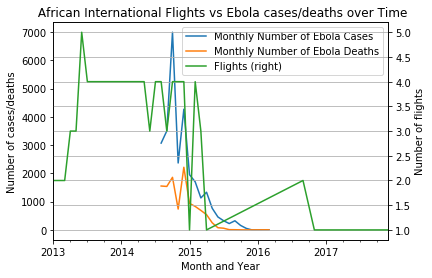

In [197]:
ax = plt.gca()
grouped_monthly_ebola.plot.line(x = 'Month and Year', y='Monthly Number of Ebola Cases',ax=ax)
grouped_monthly_ebola.plot.line(x = 'Month and Year', y='Monthly Number of Ebola Deaths',ax=ax)
monthly_flights_ebola.plot.line(x = 'Month and Year', y='Flights',ax=ax, secondary_y = True)
plt.title(" African International Flights vs Ebola cases/deaths over Time")
ax.set_ylabel('Number of cases/deaths')
ax.right_ax.set_ylabel('Number of flights')
plt.grid()
plt.show()

In [198]:
merged_ebola_flight_data = pd.merge(monthly_flights_ebola, grouped_monthly_ebola, on=['Month and Year'])
merged_ebola_flight_data

,Month and Year,Flights,Monthly Number of Ebola Cases,Monthly Number of Ebola Deaths,Month,Year
0,2014-08,4,3071.0,1553.0,8,2014
1,2014-09,3,3503.0,1538.0,9,2014
2,2014-10,4,6993.0,1860.0,10,2014
3,2014-11,4,2368.0,738.0,11,2014
4,2014-12,4,4270.0,2216.0,12,2014
5,2015-01,1,1954.0,939.0,1,2015
6,2015-02,4,1701.0,831.0,2,2015
7,2015-03,3,1132.0,690.0,3,2015
8,2015-04,1,1333.0,540.0,4,2015


The r-squared is: 0.475427380274361


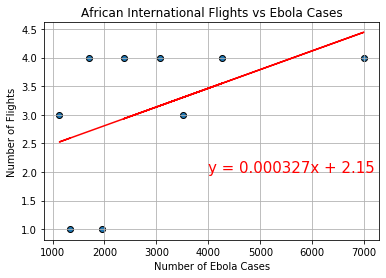

In [199]:
# Build a scatter plot
plt.scatter(merged_ebola_flight_data["Monthly Number of Ebola Cases"], merged_ebola_flight_data["Flights"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("African International Flights vs Ebola Cases")
plt.ylabel("Number of Flights")
plt.xlabel("Number of Ebola Cases")
plt.grid(True)

x_values = merged_ebola_flight_data["Monthly Number of Ebola Cases"]
y_values = merged_ebola_flight_data["Flights"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,6)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4000,2),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()


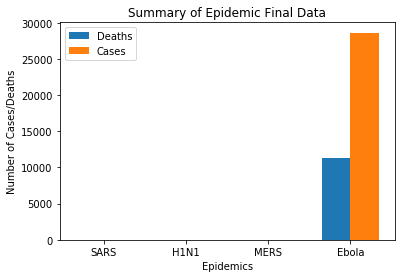

In [200]:
cases = (20, 35, 30, final_ebola_cases)
deaths = (25, 32, 34, final_ebola_deaths)

x = np.arange(4) 
width = 0.35       
plt.bar(x, deaths, width, label='Deaths')
plt.bar(x + width, cases, width, label='Cases')

plt.xlabel('Epidemics')
plt.ylabel('Number of Cases/Deaths')
plt.title('Summary of Epidemic Final Data')

plt.xticks(x + width / 2, ('SARS', 'H1N1', 'MERS', 'Ebola'))
plt.legend(loc='best')
plt.show()

# SARS Data Analysis (Ryan Ashcraft)

In [201]:
# Create a reference the CSV file desired
SARS_csv = "../group3/SARS_data/sars_2003_complete_dataset_clean.csv"

# Read the CSV into a Pandas DataFrame
SARS_df = pd.read_csv(SARS_csv)

SARS_df

,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,2003-03-17,Germany,1,0,0
1,2003-03-17,Canada,8,2,0
2,2003-03-17,Singapore,20,0,0
3,2003-03-17,"Hong Kong SAR, China",95,1,0
4,2003-03-17,Switzerland,2,0,0
...,...,...,...,...,...
2533,2003-07-11,Switzerland,1,0,1
2534,2003-07-11,Thailand,9,2,7
2535,2003-07-11,United Kingdom,4,0,4
2536,2003-07-11,United States,75,0,67


In [202]:
grouped_SARS = SARS_df.groupby('Date')
cumulative_SARS = grouped_SARS.sum()

SARS_summary = pd.DataFrame({
                             "Case Count": cumulative_SARS['Cumulative number of case(s)'],
                             "Death Count": cumulative_SARS['Number of deaths'],
                             "Recovered Count": cumulative_SARS['Number recovered']
                            })

SARS_summary = SARS_summary.reset_index()
SARS_summary

,Date,Case Count,Death Count,Recovered Count
0,2003-03-17,167,4,0
1,2003-03-18,219,4,0
2,2003-03-19,264,9,0
3,2003-03-20,306,10,0
4,2003-03-21,350,10,0
...,...,...,...,...
91,2003-07-07,8434,812,7426
92,2003-07-08,8431,812,7428
93,2003-07-09,8431,812,7438
94,2003-07-10,8432,812,7444


In [203]:
# Combine Chinese Data
SARS_china = SARS_df.replace(to_replace=['Hong Kong SAR, China', 'Macao SAR, China', 'Taiwan, China'],
                value='China')
SARS_final = SARS_china.replace(to_replace=['Viet Nam'],
                value='Vietnam')

country_totals = SARS_final[SARS_final['Date'] == max(SARS_final['Date'])].reset_index()
country_totals

,index,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,2507,2003-07-11,Brazil,1,0,1
1,2508,2003-07-11,Canada,250,38,194
2,2509,2003-07-11,China,5327,348,4941
3,2510,2003-07-11,China,1755,298,1433
4,2511,2003-07-11,China,1,0,1
5,2512,2003-07-11,China,671,84,507
6,2513,2003-07-11,Colombia,1,0,1
7,2514,2003-07-11,Finland,1,0,1
8,2515,2003-07-11,France,7,1,6
9,2516,2003-07-11,Germany,10,0,9


In [204]:
grouped_countries = country_totals.groupby('Country')
grouped_countries = grouped_countries.sum()
grouped_countries = grouped_countries.drop(['index'], axis=1)

country_summary = pd.DataFrame({
                             "Case Count": grouped_countries['Cumulative number of case(s)'],
                             "Death Count": grouped_countries['Number of deaths'],
                             "Recovered Count": grouped_countries['Number recovered'],
                             "Mortality Rate": 100*(grouped_countries['Number of deaths']/grouped_countries['Cumulative number of case(s)'])
                            })

country_summary['Mortality Rate'] = country_summary['Mortality Rate'].map("{:.2f}%".format)

country_summary

,Case Count,Death Count,Recovered Count,Mortality Rate
Country,,,,
Brazil,1,0,1,0.00%
Canada,250,38,194,15.20%
China,7754,730,6882,9.41%
Colombia,1,0,1,0.00%
Finland,1,0,1,0.00%
France,7,1,6,14.29%
Germany,10,0,9,0.00%
India,3,0,3,0.00%
Indonesia,2,0,2,0.00%


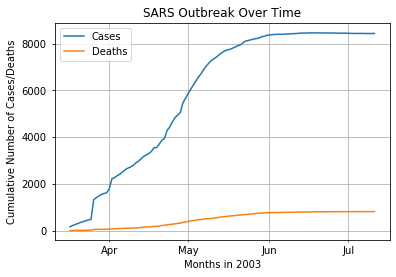

In [205]:
summed_dates = []
for row in SARS_summary['Date']:
    summed_dates.append(matplotlib.dates.date2num(datetime.strptime(row, '%Y-%m-%d')))

cases_over_time, = plt.plot(summed_dates, SARS_summary['Case Count'], label="Cases")
deaths_over_time, = plt.plot(summed_dates, SARS_summary['Death Count'], label="Deaths")

# x_axis = dates
# y_axis = SARS_summary['Case Count']

ax = plt.gca()
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%b'))
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
ax.tick_params(pad=5)

# ax.plot(x_axis, y_axis)
plt.title("SARS Outbreak Over Time")
plt.xlabel("Months in 2003")
plt.ylabel("Cumulative Number of Cases/Deaths")
plt.legend(handles=[cases_over_time, deaths_over_time], loc="best")
plt.grid(which='both')
plt.show()

In [206]:
# Create and clean lat/lng csv
lat_lng_csv = "../group3/citycoords.csv"
lat_lng_df = pd.read_csv(lat_lng_csv)
lat_lng_df = lat_lng_df.rename(columns={"name_long": "Country"})
lat_lng_df = lat_lng_df.replace(to_replace=['Ireland'],
                value='Republic of Ireland')

countries_lat_lng = pd.merge(country_summary, lat_lng_df, on='Country')

countries_lat_lng = countries_lat_lng[['Country', 'Case Count', 'Death Count', 'Recovered Count', 'Mortality Rate', 'Longitude', 'Latitude']]

# Access maps with unique API key
gmaps.configure(api_key=g_key)

locations = countries_lat_lng[["Latitude", "Longitude"]]

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=countries_lat_lng['Case Count'], 
                                 dissipating=False, max_intensity=70,
                                 point_radius=5)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [207]:
SARS_cases = country_summary['Case Count'].sum()

SARS_deaths = country_summary['Death Count'].sum()

final_summary = pd.DataFrame({'Cases': [SARS_cases],
                              'Deaths': [SARS_deaths]
                            })

final_summary['Mortality Rate'] = 100*(final_summary['Deaths']/final_summary['Cases'])
final_summary['Mortality Rate'] = final_summary['Mortality Rate'].map("{:.2f}%".format)


final_summary

,Cases,Deaths,Mortality Rate
0,8432,813,9.64%


In [208]:
daily_SARS_cases = [SARS_summary.iloc[0,1]]
daily_SARS_deaths = [SARS_summary.iloc[0,2]]
for x in range(1,len(SARS_summary)):
    daily_case = SARS_summary.iloc[x,1] - SARS_summary.iloc[x-1,1]
    daily_SARS_cases.append(daily_case)
    daily_deaths = SARS_summary.iloc[x,2] - SARS_summary.iloc[x-1,2]
    daily_SARS_deaths.append(daily_deaths)

daily_SARS_cases
daily_SARS_deaths

SARS_summary['Daily Cases'] = daily_SARS_cases
SARS_summary['Daily Deaths'] = daily_SARS_deaths

SARS_summary

,Date,Case Count,Death Count,Recovered Count,Daily Cases,Daily Deaths
0,2003-03-17,167,4,0,167,4
1,2003-03-18,219,4,0,52,0
2,2003-03-19,264,9,0,45,5
3,2003-03-20,306,10,0,42,1
4,2003-03-21,350,10,0,44,0
...,...,...,...,...,...,...
91,2003-07-07,8434,812,7426,0,0
92,2003-07-08,8431,812,7428,-3,0
93,2003-07-09,8431,812,7438,0,0
94,2003-07-10,8432,812,7444,1,0


In [209]:
SARS_summary['Month and Year'] = pd.to_datetime(SARS_summary['Date']).dt.to_period('M')

SARS_summary

,Date,Case Count,Death Count,Recovered Count,Daily Cases,Daily Deaths,Month and Year
0,2003-03-17,167,4,0,167,4,2003-03
1,2003-03-18,219,4,0,52,0,2003-03
2,2003-03-19,264,9,0,45,5,2003-03
3,2003-03-20,306,10,0,42,1,2003-03
4,2003-03-21,350,10,0,44,0,2003-03
...,...,...,...,...,...,...,...
91,2003-07-07,8434,812,7426,0,0,2003-07
92,2003-07-08,8431,812,7428,-3,0,2003-07
93,2003-07-09,8431,812,7438,0,0,2003-07
94,2003-07-10,8432,812,7444,1,0,2003-07


In [210]:
monthly_grouping = SARS_summary.groupby('Month and Year')
monthly_grouping = monthly_grouping.sum()
monthly_grouping

monthly_sars_summary = pd.DataFrame({'Monthly Cases': monthly_grouping['Daily Cases'],
                                     'Monthly Deaths': monthly_grouping['Daily Deaths'],
                                     })

monthly_sars_summary = monthly_sars_summary.reset_index()
monthly_sars_summary['Month'] = monthly_sars_summary['Month and Year'].dt.month
monthly_sars_summary['Year'] = monthly_sars_summary['Month and Year'].dt.year

monthly_sars_summary

,Month and Year,Monthly Cases,Monthly Deaths,Month,Year
0,2003-03,1622,58,3,2003
1,2003-04,4037,314,4,2003
2,2003-05,2695,392,5,2003
3,2003-06,93,47,6,2003
4,2003-07,-15,2,7,2003


In [211]:
sars_flight_data = pd.merge(flight_data_df, monthly_sars_summary, on=['Month', 'Year'])

sars_flight_data

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL,Date,Month and Year,Monthly Cases,Monthly Deaths
0,2003,3,797634.0,97929.0,895563.0,2003-03-01,2003-03,1622,58
1,2003,4,766639.0,89398.0,856037.0,2003-04-01,2003-04,4037,314
2,2003,5,789857.0,87671.0,877528.0,2003-05-01,2003-05,2695,392
3,2003,6,798841.0,95435.0,894276.0,2003-06-01,2003-06,93,47
4,2003,7,832075.0,102795.0,934870.0,2003-07-01,2003-07,-15,2


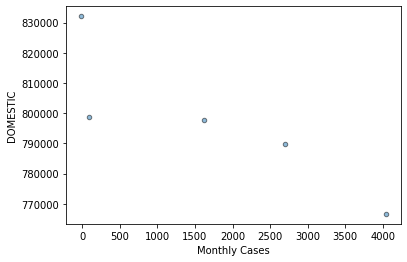

In [212]:
sars_flight_data.plot.scatter(x='Monthly Cases', y='DOMESTIC', marker="o", facecolors="blue", alpha=.5, edgecolors="black")